In [0]:
# Import the dependencies
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Load the data
#from google.colab import files
#uploaded = files.upload()
nba = pd.read_csv('nba_2013.csv')
nba.head(7)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,0,0,NaN,33,61,0.540984,0.541,26,30,0.867,37,92,129,14,8,30,18,40,92,2013-2014,2013
6,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,0.458,3,15,0.200000,649,1408,0.460938,0.459,296,360,0.822,166,599,765,178,63,68,123,147,1603,2013-2014,2013


In [9]:
# Get the number of rows and columns (481 rows 'players' and 21 columns 'features')
nba.shape

(481, 31)

In [11]:
# Find the average value for each numeric column (the average age of each player is 26)
nba.mean()

age             26.509356
g               53.253638
gs              25.571726
mp            1237.386694
fg             192.881497
fga            424.463617
fg.              0.436436
x3p             39.613306
x3pa           110.130977
x3p.             0.285111
x2p            153.268191
x2pa           314.332640
x2p.             0.466947
efg.             0.480752
ft              91.205821
fta            120.642412
ft.              0.722419
orb             55.810811
drb            162.817048
trb            218.627859
ast            112.536383
stl             39.280665
blk             24.103950
tov             71.862786
pf             105.869023
pts            516.582121
season_end    2013.000000
dtype: float64

In [12]:
# Get the mean/average of a specific column
nba.loc[:, 'fg'].mean()

192.88149688149687

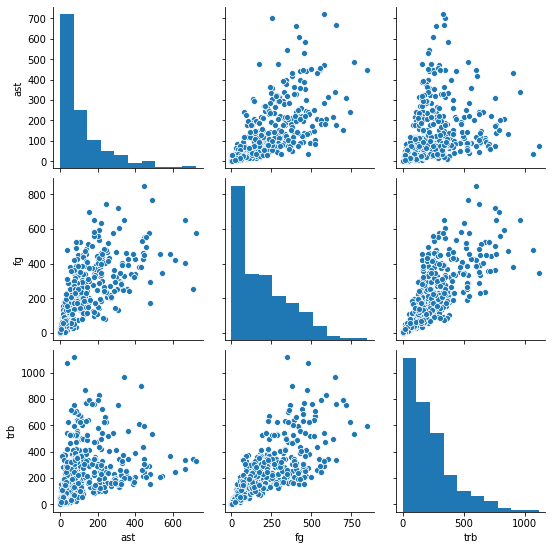

In [13]:
# Make a pairwise scatter plot
sns.pairplot(nba[['ast', 'fg', 'trb']]) # Scatter plotting assits, field goals and total re-bounds

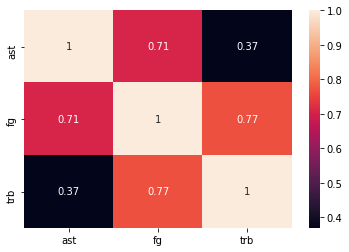

In [17]:
# Make a heat map to see correlations
correlation = nba[['ast', 'fg', 'trb']].corr()
sns.heatmap(correlation, annot=True)

In [21]:
# Make the cluster of players using kMeans
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1) # Creating KMeans model with 5 clusters 
good_columns = nba._get_numeric_data().dropna(axis=1) # Get numeric data and remove columns with missing data

#Train the model
kmeans_model.fit(good_columns)
label = kmeans_model.labels_ # Get the labels or (cluster label for each player)
label

array([0, 0, 0, 1, 0, 3, 1, 0, 2, 2, 4, 3, 2, 2, 4, 0, 2, 1, 3, 0, 4, 3,
       0, 0, 4, 3, 0, 3, 3, 3, 2, 2, 4, 2, 3, 4, 2, 1, 2, 3, 0, 1, 0, 4,
       0, 2, 3, 3, 0, 2, 2, 2, 2, 3, 3, 2, 0, 2, 4, 1, 4, 2, 4, 3, 2, 3,
       3, 3, 3, 0, 3, 4, 4, 2, 4, 3, 3, 0, 0, 0, 4, 2, 3, 4, 4, 1, 2, 4,
       2, 4, 3, 3, 0, 3, 3, 2, 3, 4, 2, 1, 3, 1, 3, 3, 4, 4, 0, 2, 3, 3,
       1, 2, 3, 3, 3, 1, 0, 2, 3, 3, 3, 0, 4, 1, 4, 0, 0, 0, 1, 1, 2, 4,
       4, 1, 3, 3, 1, 3, 0, 0, 4, 4, 0, 3, 4, 3, 4, 3, 2, 2, 4, 3, 3, 0,
       4, 0, 0, 0, 4, 4, 1, 0, 1, 4, 2, 3, 3, 3, 3, 3, 4, 1, 0, 3, 2, 2,
       4, 1, 0, 1, 3, 0, 3, 0, 2, 1, 2, 3, 3, 0, 3, 3, 3, 4, 0, 4, 0, 1,
       4, 0, 4, 4, 4, 2, 4, 2, 3, 4, 0, 3, 3, 0, 1, 0, 2, 1, 2, 2, 1, 3,
       4, 4, 3, 3, 3, 1, 3, 3, 3, 1, 4, 3, 1, 0, 4, 0, 0, 1, 3, 4, 3, 3,
       0, 3, 4, 4, 0, 0, 4, 3, 2, 2, 0, 1, 4, 2, 3, 3, 0, 2, 3, 3, 4, 3,
       4, 1, 3, 4, 3, 0, 0, 3, 1, 4, 2, 0, 4, 1, 1, 3, 2, 0, 4, 2, 0, 0,
       4, 3, 1, 3, 3, 2, 0, 0, 3, 3, 4, 4, 4, 3, 4,

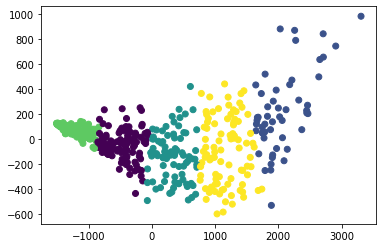

In [24]:
# Plot players by cluster
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=label)
plt.show()

In [31]:
# Find LeBron
LeBron = good_columns.loc[nba['player'] == 'LeBron James',:]

# Find Durant
Durant = good_columns.loc[nba['player'] == 'Kevin Durant',:]

# Print players
print(LeBron)
print(Durant)

     age   g  gs    mp   fg   fga  ...  stl  blk  tov   pf   pts  season_end
225   29  77  77  2902  767  1353  ...  121   26  270  126  2089        2013

[1 rows x 22 columns]
     age   g  gs    mp   fg   fga  ...  stl  blk  tov   pf   pts  season_end
133   25  81  81  3122  849  1688  ...  103   59  285  174  2593        2013

[1 rows x 22 columns]


In [36]:
# Convert player data to lists for model prediction
LeBron_list = LeBron.values.tolist()
Durant_list = Durant.values.tolist()

# The cluster classification of LeBron and Durant
LeBron_cluter = kmeans_model.predict(LeBron_list) # LeBron belongs to cluster 1
Durant_cluster = kmeans_model.predict(Durant_list) # Durant belongs to cluster 1

# print the cluster label
print(LeBron_cluter)
print(Durant_cluster)


[1]
[1]


In [37]:
nba.corr()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
age,1.000000,-0.012074,0.025163,0.007961,-0.009749,-0.018304,0.025221,0.050611,0.028850,0.014235,-0.028862,-0.035970,0.011306,0.073002,-0.046554,-0.061751,0.021481,-0.068726,0.010822,-0.013451,0.019216,-0.028315,-0.017398,-0.030789,-0.028221,-0.011910,NaN
g,-0.012074,1.000000,0.610951,0.864487,0.739993,0.746963,0.322201,0.518074,0.537011,0.103762,0.684729,0.694243,0.283050,0.351884,0.598333,0.615001,0.252328,0.546902,0.707389,0.682688,0.551128,0.709650,0.475581,0.713508,0.865797,0.728462,NaN
gs,0.025163,0.610951,1.000000,0.860036,0.821619,0.811531,0.234677,0.501808,0.515718,0.063468,0.785619,0.784812,0.205289,0.231222,0.707049,0.720527,0.178607,0.560067,0.774892,0.735738,0.636059,0.743178,0.505589,0.767107,0.725573,0.810294,NaN
mp,0.007961,0.864487,0.860036,1.000000,0.931120,0.936883,0.273682,0.645056,0.666126,0.138230,0.863941,0.874109,0.243727,0.304770,0.805468,0.814450,0.278872,0.576844,0.821145,0.774492,0.733041,0.852331,0.506254,0.885406,0.884484,0.927464,NaN
fg,-0.009749,0.739993,0.821619,0.931120,1.000000,0.988262,0.278007,0.597239,0.613988,0.110514,0.960853,0.962059,0.238487,0.277694,0.893619,0.895138,0.277730,0.562293,0.820259,0.769339,0.708228,0.786597,0.484208,0.903383,0.798769,0.992041,NaN
fga,-0.018304,0.746963,0.811531,0.936883,0.988262,1.000000,0.211174,0.662004,0.685535,0.152111,0.924781,0.944490,0.185373,0.236838,0.887922,0.877945,0.312489,0.487154,0.771821,0.710910,0.748141,0.803290,0.412738,0.910689,0.786560,0.989211,NaN
fg.,0.025221,0.322201,0.234677,0.273682,0.278007,0.211174,1.000000,-0.025510,-0.041720,-0.039424,0.333179,0.283523,0.880201,0.908930,0.217450,0.258550,-0.008697,0.423358,0.377067,0.404832,0.068105,0.185385,0.401431,0.221846,0.359125,0.248276,NaN
x3p,0.050611,0.518074,0.501808,0.645056,0.597239,0.662004,-0.025510,1.000000,0.991700,0.462709,0.351640,0.382531,0.041768,0.219614,0.503353,0.441246,0.369515,-0.065822,0.280171,0.182848,0.617553,0.592092,-0.043707,0.560520,0.446711,0.655342,NaN
x3pa,0.028850,0.537011,0.515718,0.666126,0.613988,0.685535,-0.041720,0.991700,1.000000,0.449886,0.374057,0.408290,0.042401,0.196420,0.527835,0.467615,0.370768,-0.058075,0.291838,0.193712,0.643211,0.622973,-0.040987,0.589799,0.463455,0.672076,NaN
x3p.,0.014235,0.103762,0.063468,0.138230,0.110514,0.152111,-0.039424,0.462709,0.449886,1.000000,-0.032484,-0.013775,-0.118689,0.296875,0.059541,0.017214,0.289435,-0.314490,-0.094895,-0.166848,0.212819,0.150476,-0.187411,0.097876,-0.019089,0.144431,NaN


In [0]:
# Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(nba[['fg']], nba[['ast']], test_size=0.2, random_state=2)

In [41]:
# Predict the # of assists per player from field goals made
# Create the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train) # training the model

predictions = lr.predict(x_test) # Make predictions on test data

print(predictions) # Print the predictions
print(y_test) # Print the actual values

[[ 36.15854037]
 [ 29.5090837 ]
 [ 26.18435536]
 [ 13.99368479]
 [ 88.80007237]
 [245.61642559]
 [ 72.17643069]
 [106.53195683]
 [ 39.48326871]
 [263.90243144]
 [ 37.82090454]
 [ 54.99866761]
 [ 16.21017035]
 [253.92824643]
 [ 11.22307784]
 [273.32249506]
 [ 15.10192757]
 [ 42.80799704]
 [ 45.57860399]
 [ 14.54780618]
 [102.09898572]
 [ 27.84671953]
 [223.45157001]
 [129.80505519]
 [ 87.1377082 ]
 [  8.4524709 ]
 [ 33.94205481]
 [ 23.9678698 ]
 [305.46153565]
 [ 53.33630344]
 [133.68390492]
 [204.61144277]
 [166.3770669 ]
 [ 48.90333233]
 [ 21.75138424]
 [ 39.48326871]
 [358.65718904]
 [ 22.30550563]
 [ 38.37502593]
 [ 30.61732648]
 [170.81003801]
 [171.3641594 ]
 [225.11393418]
 [132.57566214]
 [ 27.84671953]
 [ 59.98576012]
 [ 86.02946542]
 [109.30256378]
 [218.46447751]
 [158.06524605]
 [111.51904934]
 [330.39699818]
 [  7.89834951]
 [368.07725266]
 [190.75840803]
 [ 73.28467346]
 [153.63227494]
 [103.2072285 ]
 [173.02652357]
 [194.08313637]
 [ 21.19726285]
 [138.11687603]
 [ 79.38

In [42]:
# Test the model: score returns the coefficient of determination (r squared) of the prediction
lr_confidence = lr.score(x_test, y_test)
print(f'lr confidence: {lr_confidence}') # not a huge correlation between assists and field goals

lr confidence: 0.4353770673978876
